In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('example_data.csv')
data

,SAT Math,SAT Verbal,GPA,Credits earned,Family income,Days drinking (last 30 days),Income
0,4,4,252,132,135100,2,45000
1,3,3,344,135,4450,3,4200
2,3,3,231,120,75000,7,25000
3,4,5,215,125,63250,8,38000
4,2,2,111,31,55000,4,37500
...,...,...,...,...,...,...,...
723,4,4,277,121,46650,1,39000
724,4,4,378,128,60200,3,42000
725,3,2,198,89,120000,15,45000
726,4,4,221,139,158000,2,38000


In [2]:
# Zmienna zależna (y) to 'Income', a zmienne niezależne (X) to pozostałe kolumny
X = data.drop('Income', axis=1)
y = data['Income']

# Skalowanie danych, aby wpływały na model w sposób zrównoważony
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu regresji liniowej
model = LinearRegression()

# Trenowanie modelu na zbiorze uczącym
model.fit(X_train, y_train)

# Analiza współczynników
coefficients = model.coef_
intercept = model.intercept_
print("Współczynniki regresji:")
for i, col in enumerate(X.columns):
    print(f"{col}: {coefficients[i]}")
print(f'Przecięcie (intercept): {intercept}')

Współczynniki regresji:
SAT Math: 2912.601911571772
SAT Verbal: -1441.454791790621
GPA: 487.1223783682839
Credits earned: 2018.46561257583
Family income: 6914.907605542716
Days drinking (last 30 days): 525.6792111083766
Przecięcie (intercept): 28164.43589558724


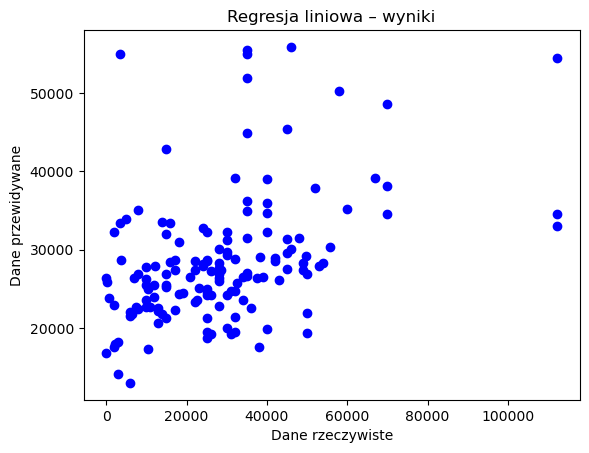

In [3]:
# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

# Wykres danych rzeczywistych vs przewidywanych
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Dane rzeczywiste')
plt.ylabel('Dane przewidywane')
plt.title('Regresja liniowa – wyniki')
plt.show()

In [4]:
# Analiza jakości modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Średni błąd kwadratowy (MSE): {mse}')
print(f'R^2 (współczynnik determinacji): {r2}')

Średni błąd kwadratowy (MSE): 335868392.77233595
R^2 (współczynnik determinacji): 0.18418994299889058


In [5]:
# Test F na istotność modelu ogółem
f_statistic_model, p_value_model = f_regression(X_test, y_test)
print(f"F-statistic: {f_statistic_model[0]}")
print(f"P-value: {p_value_model[0]}\n")

F-statistic: 1.346332817127145
P-value: 0.2478403306540794



In [6]:
# Test F na istotność poszczególnych predyktorów
f_statistic, p_value = f_regression(X_test, y_test)
for i, col in enumerate(X.columns):
    print(f"{col}:")
    print(f"  Statystyka F: {f_statistic[i]}")
    print(f"  Wartość p: {p_value[i]}\n")

SAT Math:
  Statystyka F: 1.346332817127145
  Wartość p: 0.2478403306540794

SAT Verbal:
  Statystyka F: 1.743585657699364
  Wartość p: 0.18878001572493602

GPA:
  Statystyka F: 0.16889535346105244
  Wartość p: 0.6817063424495307

Credits earned:
  Statystyka F: 1.8666109233842
  Wartość p: 0.1739934828157546

Family income:
  Statystyka F: 27.72084922430947
  Wartość p: 4.995368935248421e-07

Days drinking (last 30 days):
  Statystyka F: 0.12031950334920574
  Wartość p: 0.7291946074154584



In [7]:
# Analiza jakości modelu na istotnych predyktorach
X_train_significant = X_train[:, p_value < 0.05]
X_test_significant = X_test[:, p_value < 0.05]
model.fit(X_train_significant, y_train)
y_pred_significant = model.predict(X_test_significant)

mse_significant = mean_squared_error(y_test, y_pred_significant)
r2_significant = r2_score(y_test, y_pred_significant)
print(f'Średni błąd kwadratowy (MSE) dla istotnych predyktorów: {mse_significant}')
print(f'R^2 (współczynnik determinacji) dla istotnych predyktorów: {r2_significant}')

Średni błąd kwadratowy (MSE) dla istotnych predyktorów: 346449767.4297066
R^2 (współczynnik determinacji) dla istotnych predyktorów: 0.15848823349557628


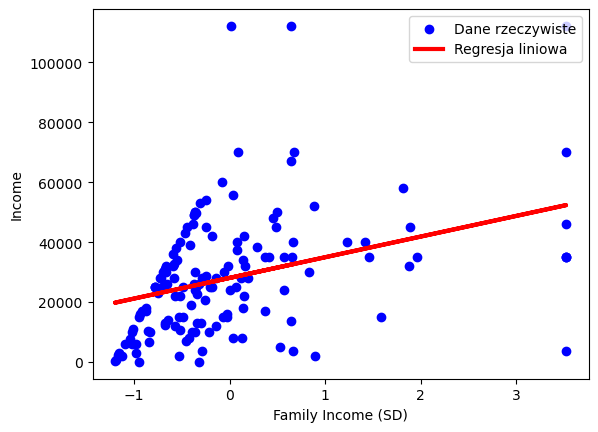

In [8]:
# Wykres z linią regresji dla zmiennej zależnej i jedynego istotnego predyktora (1-D)
plt.scatter(X_test_significant, y_test, color='blue', label='Dane rzeczywiste')
plt.plot(X_test_significant, y_pred_significant, color='red', linewidth=3, label='Regresja liniowa')
plt.xlabel('Family Income (SD)')
plt.ylabel('Income')
plt.legend()
plt.show()

In [9]:
data['Family income'].mean()

71086.52884615384

In [10]:
data['Family income'].std()

59108.85821035426